# Introduction
It's important to be interested in Public Housing Physical Inspection Scores for several key reasons, as these scores provide crucial information about the safety, quality, and overall condition of housing that impacts residents and communities. Theses scores are important for a multiple of reasons: they ensure resident safety and well-being, the hold housing providers accountable, they inform funding decisions and program participation, they guide maintenance and improvements. The Public Housing Physical Inspection Scores (from 2018 through 2021) dataset is obtained from: https://www.huduser.gov/portal/datasets/pis.html#year2016. 

# Data Exploration
The Public Housing Physical Inspection Scores dataset  will be imported into my .ipynb, I will create dataframes, and explore the data.

In [7]:
import pandas as pd
# Import dataset
df_2018 = pd.read_excel("https://raw.githubusercontent.com/henock93/Data_Science/main/public-housing-physical-inspection-scores-2018.xlsx", engine='openpyxl')
df_2019 = pd.read_excel("https://raw.githubusercontent.com/henock93/Data_Science/main/public-housing-physical-inspection-scores-2019.xlsx", engine='openpyxl')
df_2020 = pd.read_excel("https://raw.githubusercontent.com/henock93/Data_Science/main/public_housing_physical_inspection_scores_0620.xlsx", engine='openpyxl')
df_2021 = pd.read_excel("https://raw.githubusercontent.com/henock93/Data_Science/main/public_housing_physical_inspection_scores_0321.xlsx", engine='openpyxl')

In [8]:
# Checking for missing data

print(df_2018.isnull().sum())

print(df_2019.isnull().sum())

print(df_2020.isnull().sum())

print(df_2021.isnull().sum())

INSPECTION_ID         0
DEVELOPMENT_ID        0
DEVELOPMENT_NAME      0
ADDRESS               0
CITY                  0
CBSA_NAME           988
CBSA_CODE             4
COUNTY_NAME           4
COUNTY_CODE           4
STATE_CODE            0
FIPS_STATE_CODE       0
ZIP                   4
LATITUDE              4
LONGITUDE             4
LOCATION_QUALITY      4
PHA_CODE              0
PHA_NAME              0
INSPECTION_SCORE      0
INSPECTION_DATE       0
dtype: int64
INSPECTION_ID         0
DEVELOPMENT_ID        0
DEVELOPMENT_NAME      0
ADDRESS               0
CITY                  0
CBSA_NAME           970
CBSA_CODE             1
COUNTY_NAME           1
COUNTY_CODE           1
STATE_CODE            0
FIPS_STATE_CODE       0
ZIP                   1
LATITUDE              1
LONGITUDE             1
LOCATION_QUALITY      1
PHA_CODE              0
PHA_NAME              0
INSPECTION_SCORE      0
INSPECTION_DATE       0
dtype: int64
INSPECTION_ID         0
DEVELOPMENT_ID        0
DEVELOPMENT_NA

#### Comment:
From checking for missing data, we observe that CBSA_NAME, CBSA_CODE, COUNTY_NAME, COUNTY_CODE, STATE_CODE, LATITUDE, LONGITUDE have some missing data. The focus here will be the INSPECTION_SCORE which has no missing values. 

In [10]:
# Summary Statistics

print(df_2018['INSPECTION_SCORE'].describe())
print(df_2019['INSPECTION_SCORE'].describe())
print(df_2020['INSPECTION_SCORE'].describe())
print(df_2021['INSPECTION_SCORE'].describe())

count    6923.000000
mean       83.118879
std        14.650928
min         8.000000
25%        77.000000
50%        88.000000
75%        94.000000
max       100.000000
Name: INSPECTION_SCORE, dtype: float64
count    6783.000000
mean       81.699690
std        14.913202
min         8.000000
25%        74.000000
50%        86.000000
75%        93.000000
max       100.000000
Name: INSPECTION_SCORE, dtype: float64
count    6638.000000
mean       81.133474
std        15.580688
min         3.000000
25%        73.000000
50%        86.000000
75%        93.000000
max       100.000000
Name: INSPECTION_SCORE, dtype: float64
count    6524.000000
mean       81.170294
std        15.492219
min         3.000000
25%        73.000000
50%        85.500000
75%        93.000000
max       100.000000
Name: INSPECTION_SCORE, dtype: float64


#### Comment:
The summary statistics are relatively stable throughout the years. 

# Data Wrangling
Let's identify the variables (column names) that make up our dataframes. 

In [13]:
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)
print(df_2021.columns)

Index(['INSPECTION_ID', 'DEVELOPMENT_ID', 'DEVELOPMENT_NAME', 'ADDRESS ',
       'CITY', 'CBSA_NAME', 'CBSA_CODE', 'COUNTY_NAME', 'COUNTY_CODE',
       'STATE_CODE', 'FIPS_STATE_CODE', 'ZIP', 'LATITUDE', 'LONGITUDE',
       'LOCATION_QUALITY', 'PHA_CODE', 'PHA_NAME', 'INSPECTION_SCORE',
       'INSPECTION_DATE'],
      dtype='object')
Index(['INSPECTION_ID', 'DEVELOPMENT_ID', 'DEVELOPMENT_NAME', 'ADDRESS ',
       'CITY', 'CBSA_NAME', 'CBSA_CODE', 'COUNTY_NAME', 'COUNTY_CODE',
       'STATE_CODE', 'FIPS_STATE_CODE', 'ZIP', 'LATITUDE', 'LONGITUDE',
       'LOCATION_QUALITY', 'PHA_CODE', 'PHA_NAME', 'INSPECTION_SCORE',
       'INSPECTION_DATE'],
      dtype='object')
Index(['INSPECTION_ID', 'DEVELOPMENT_ID', 'DEVELOPMENT_NAME', 'ADDRESS',
       'CITY', 'CBSA_NAME', 'CBSA_CODE', 'COUNTY_NAME', 'COUNTY_CODE',
       'STATE_NAME', 'STATE_CODE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_QUALITY', 'PHA_CODE', 'PHA_NAME', 'INSPECTION_SCORE',
       'INSPECTION_DATE'],
      dtype='

#### Comment:
The dataframes do not have the same number of observations df_2018 has 6923 obs, df_2019 has 6783 obs, df_2020 has 6638 obs and df_2021 has 6524 obs. With that, a merge join will be performed using the variables ADDRESS, CITY, ZIPCODE, STATE_CODE. But before, we need to rename the ZIP column into ZIPCODE in df_2018 and df_2019. I will also rename INSPECTION_SCORE for all the dataframes to prevent any conflicts during the merge.

In [15]:
df_2018.rename(columns={
    'ZIP': 'ZIPCODE',
    'ADDRESS ' : 'ADDRESS',
    'INSPECTION_SCORE': 'INSPECTION_SCORE_2018'
}, inplace=True)

df_2019.rename(columns={
    'ZIP': 'ZIPCODE',
    'ADDRESS ' : 'ADDRESS',
    'INSPECTION_SCORE': 'INSPECTION_SCORE_2019'
}, inplace=True)

df_2020.rename(columns={'INSPECTION_SCORE': 'INSPECTION_SCORE_2020'}, inplace=True)

df_2021.rename(columns={'INSPECTION_SCORE': 'INSPECTION_SCORE_2021'}, inplace=True)

##### 
Selecting the Variables of interest from each dataframe: ADDRESS, CITY, ZIPCODE, STATE_CODE, INSPECTION_SCORE, and converting STATE_CODE into a constant data type (string).

In [22]:
df_2018 = df_2018[['ADDRESS', 'CITY', 'ZIPCODE', 'STATE_CODE', 'INSPECTION_SCORE_2018']]
df_2019 = df_2019[['ADDRESS', 'CITY', 'ZIPCODE', 'STATE_CODE', 'INSPECTION_SCORE_2019']]
df_2020 = df_2020[['ADDRESS', 'CITY', 'ZIPCODE', 'STATE_CODE', 'INSPECTION_SCORE_2020']]
df_2021 = df_2021[['ADDRESS', 'CITY', 'ZIPCODE', 'STATE_CODE', 'INSPECTION_SCORE_2021']]

df_2018.loc[:, 'STATE_CODE'] = df_2018['STATE_CODE'].astype(str)
df_2019.loc[:, 'STATE_CODE'] = df_2019['STATE_CODE'].astype(str)
df_2020.loc[:, 'STATE_CODE'] = df_2020['STATE_CODE'].astype(str)
df_2021.loc[:, 'STATE_CODE'] = df_2021['STATE_CODE'].astype(str)

df_2018 = df_2018.rename(columns={'STATE_CODE': 'STATE_CODE_2018', 'ZIPCODE': 'ZIPCODE_2018'})
df_2019 = df_2019.rename(columns={'STATE_CODE': 'STATE_CODE_2019', 'ZIPCODE': 'ZIPCODE_2019'})
df_2020 = df_2020.rename(columns={'STATE_CODE': 'STATE_CODE_2020', 'ZIPCODE': 'ZIPCODE_2020'})
df_2021 = df_2021.rename(columns={'STATE_CODE': 'STATE_CODE_2021', 'ZIPCODE': 'ZIPCODE_2021'})

C:\Users\month\AppData\Local\Temp\ipykernel_10892\2185199012.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['22.0' '13.0' '13.0' ... '42.0' '22.0' '47.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2020.loc[:, 'STATE_CODE'] = df_2020['STATE_CODE'].astype(str)
C:\Users\month\AppData\Local\Temp\ipykernel_10892\2185199012.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['22.0' '13.0' '13.0' ... '22.0' '47.0' '45.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2021.loc[:, 'STATE_CODE'] = df_2021['STATE_CODE'].astype(str)


#### Merging dataframes
Pandas doesn't merge more than two (2) variables. For that reason, we will merge sequentially. 

In [25]:
merged_df = pd.merge(df_2018, df_2019, on=['ADDRESS', 'CITY'], how='left', suffixes=('_2018', '_2019'))
merged_df = pd.merge(merged_df, df_2020, on=['ADDRESS', 'CITY'], how='left', suffixes=('_merged', '_2020'))
merged_df = pd.merge(merged_df, df_2021, on=['ADDRESS', 'CITY'], how='left', suffixes=('_final', '_2021'))

print(merged_df)

                         ADDRESS         CITY  ZIPCODE_2018 STATE_CODE_2018  \
0           378 William Penn Ave    Johnstown       15901.0              PA   
1                   603 D Street        DUSON       70529.0              LA   
2     BOSTONWAY ST BLDG 1-APT 18  ASBURY PARK        7712.0              NJ   
3            218 Merritts Ave NW      Atlanta       30313.0              GA   
4     340 N Dearborn Ave Apt 221     Kankakee       60901.0              IL   
...                          ...          ...           ...             ...   
7259              628 4th Ave SW      Fayette       35555.0              AL   
7260            1640 Artisan Ave   Huntington       25703.0              WV   
7261              511 Vinson Vlg       Dublin       31021.0              GA   
7262        7501 E Jefferson Ave      Detroit       48214.0              MI   
7263                128 Perry St     Sandusky       44870.0              OH   

      INSPECTION_SCORE_2018  ZIPCODE_2019 STATE_COD

##### Let's double check for any missing values after merging.

In [28]:
print(merged_df.isnull().sum())

ADDRESS                     0
CITY                        0
ZIPCODE_2018                4
STATE_CODE_2018             0
INSPECTION_SCORE_2018       0
ZIPCODE_2019              790
STATE_CODE_2019           789
INSPECTION_SCORE_2019     789
ZIPCODE_2020              833
STATE_CODE_2020           833
INSPECTION_SCORE_2020     833
ZIPCODE_2021             1202
STATE_CODE_2021          1202
INSPECTION_SCORE_2021    1202
dtype: int64


##### Comment:
merged_df has some missing observations that we will get rid of and keep 2018 as the basis.

In [31]:
merged_df_cleaned = merged_df.dropna()
print(merged_df_cleaned.isnull().sum())

ADDRESS                  0
CITY                     0
ZIPCODE_2018             0
STATE_CODE_2018          0
INSPECTION_SCORE_2018    0
ZIPCODE_2019             0
STATE_CODE_2019          0
INSPECTION_SCORE_2019    0
ZIPCODE_2020             0
STATE_CODE_2020          0
INSPECTION_SCORE_2020    0
ZIPCODE_2021             0
STATE_CODE_2021          0
INSPECTION_SCORE_2021    0
dtype: int64


In [33]:
final_merged_df = merged_df_cleaned[['CITY', 'STATE_CODE_2018', 'INSPECTION_SCORE_2018', 
                                     'INSPECTION_SCORE_2019', 'INSPECTION_SCORE_2020', 
                                     'INSPECTION_SCORE_2021']]

In [35]:
print(final_merged_df)

            CITY STATE_CODE_2018  INSPECTION_SCORE_2018  \
3        Atlanta              GA                     91   
4       Kankakee              IL                     96   
5        Atlanta              GA                     90   
6      Allentown              PA                     80   
7     Washington              DC                     69   
...          ...             ...                    ...   
7259     Fayette              AL                     69   
7260  Huntington              WV                     72   
7261      Dublin              GA                     54   
7262     Detroit              MI                     54   
7263    Sandusky              OH                     59   

      INSPECTION_SCORE_2019  INSPECTION_SCORE_2020  INSPECTION_SCORE_2021  
3                      91.0                   91.0                   91.0  
4                      96.0                   86.0                   86.0  
5                      90.0                   90.0             

##### Let's group our dataset by one column (STATE_CODE_2018), and get the mean, min, and max values by group. Before, let's rename STATE_CODE_2018 to STATE_CODE.

In [38]:
merged_df_cleaned.rename(columns={'STATE_CODE_2018': 'STATE_CODE'}, inplace=True)

C:\Users\month\AppData\Local\Temp\ipykernel_10892\1936032214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned.rename(columns={'STATE_CODE_2018': 'STATE_CODE'}, inplace=True)


In [40]:
print(merged_df_cleaned)

                         ADDRESS        CITY  ZIPCODE_2018 STATE_CODE  \
3            218 Merritts Ave NW     Atlanta       30313.0         GA   
4     340 N Dearborn Ave Apt 221    Kankakee       60901.0         IL   
5            120 Merritts Ave NW     Atlanta       30313.0         GA   
6            433 E Cumberland St   Allentown       18103.0         PA   
7         1227 New Jersey Ave NW  Washington       20001.0         DC   
...                          ...         ...           ...        ...   
7259              628 4th Ave SW     Fayette       35555.0         AL   
7260            1640 Artisan Ave  Huntington       25703.0         WV   
7261              511 Vinson Vlg      Dublin       31021.0         GA   
7262        7501 E Jefferson Ave     Detroit       48214.0         MI   
7263                128 Perry St    Sandusky       44870.0         OH   

      INSPECTION_SCORE_2018  ZIPCODE_2019 STATE_CODE_2019  \
3                        91       30313.0              GA   
4

#### Grouping by STATE_CODE

In [43]:
grouped_df = merged_df_cleaned.groupby('STATE_CODE').agg({
    'INSPECTION_SCORE_2018' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2019' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2020' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2021' : ['mean', 'min', 'max']
})

# View the first few rows

print(grouped_df.head())  


           INSPECTION_SCORE_2018          INSPECTION_SCORE_2019               \
                            mean min  max                  mean   min    max   
STATE_CODE                                                                     
AK                     82.222222  58   97             78.444444  58.0   95.0   
AL                     83.722944  28  100             84.216450  30.0  100.0   
AR                     79.887755  37   99             78.928571  35.0   99.0   
AZ                     86.333333  69   99             85.555556  59.0   99.0   
CA                     84.452941  35   99             83.747059  35.0   98.0   

           INSPECTION_SCORE_2020              INSPECTION_SCORE_2021        \
                            mean   min    max                  mean   min   
STATE_CODE                                                                  
AK                     81.111111  59.0   95.0             81.111111  59.0   
AL                     85.463203  30.0  100.0      

##### Group the dataset by two columns and then sort the aggregated results within the groups: grouping by CITY and STATE_CODE

In [46]:
grouped_2col_df = merged_df_cleaned.groupby(['STATE_CODE', 'CITY']).agg({
    'INSPECTION_SCORE_2018' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2019' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2020' : ['mean', 'min', 'max'],
    'INSPECTION_SCORE_2021' : ['mean', 'min', 'max']
})

# Sort by mean INSPECTION_SCORE within each group
grouped_2col_df = grouped_2col_df.sort_values(('INSPECTION_SCORE_2018', 'mean'), ascending=False)
grouped_2col_df = grouped_2col_df.sort_values(('INSPECTION_SCORE_2019', 'mean'), ascending=False)
grouped_2col_df = grouped_2col_df.sort_values(('INSPECTION_SCORE_2020', 'mean'), ascending=False)
grouped_2col_df = grouped_2col_df.sort_values(('INSPECTION_SCORE_2021', 'mean'), ascending=False)

print(grouped_2col_df)  # View the first few rows

                         INSPECTION_SCORE_2018            \
                                          mean  min  max   
STATE_CODE CITY                                            
WV         Danville                      100.0  100  100   
MI         Elk Rapids                     99.0   99   99   
MN         Arco                           99.0   99   99   
OK         Watonga                        99.0   99   99   
TX         Center                         99.0   99   99   
...                                        ...  ...  ...   
NJ         Passaic                        47.0   47   47   
IL         Cairo                          29.5   28   31   
NJ         Hoboken                        22.6    8   33   
MI         Highland Park                  37.0   37   37   
MO         Wellston                       49.0   49   49   

                         INSPECTION_SCORE_2019                \
                                          mean    min    max   
STATE_CODE CITY                

# Visualizations
#### Part 1:
Using matplotlib, let's create two or more plots:

In [49]:
import matplotlib.pyplot as plt

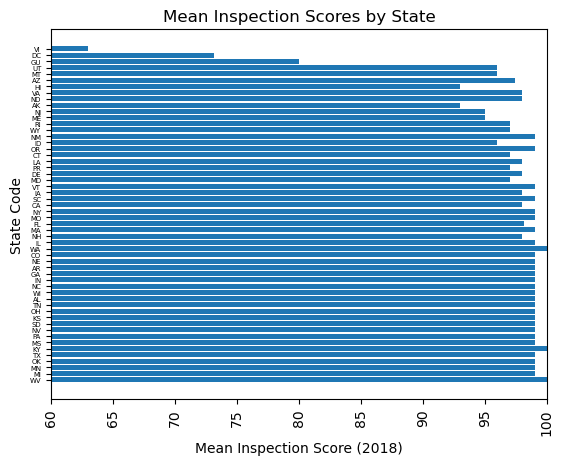

In [112]:
import matplotlib.pyplot as plt

plt.barh(grouped_2col_df.index.get_level_values("STATE_CODE"),
         grouped_2col_df[("INSPECTION_SCORE_2018", "mean")])

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2018)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

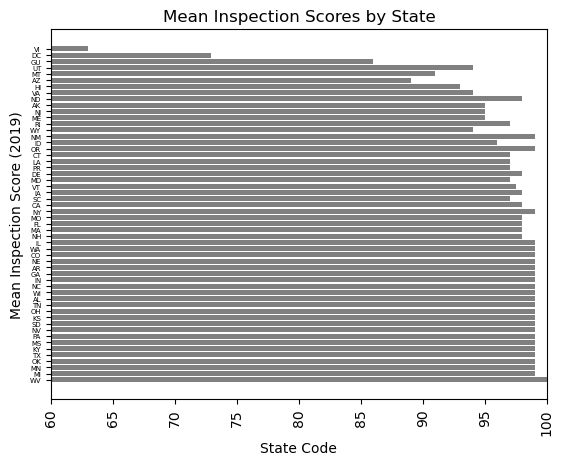

In [102]:
plt.barh(grouped_2col_df.index.get_level_values("STATE_CODE"),
         grouped_2col_df[("INSPECTION_SCORE_2019", "mean")],
        color = 'grey')

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2019)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

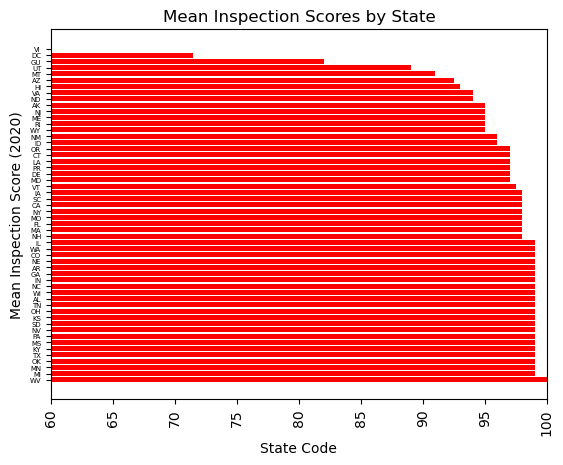

In [89]:
plt.barh(grouped_2col_df.index.get_level_values("STATE_CODE"),
         grouped_2col_df[("INSPECTION_SCORE_2020", "mean")],
        color = 'red)

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2020)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

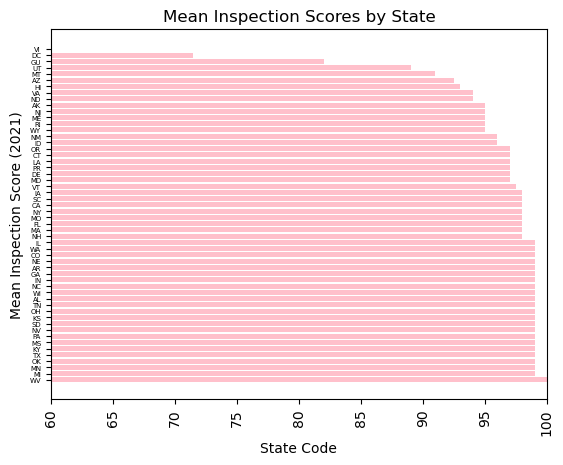

In [93]:
plt.barh(grouped_2col_df.index.get_level_values("STATE_CODE"),
         grouped_2col_df[("INSPECTION_SCORE_2021", "mean")],
        color = 'pink')

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2021)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

#### Part 2:
Recreate the visualizations above using the Seaborn library as best as possible.
Note: the comment on each plot is summarized at the end.

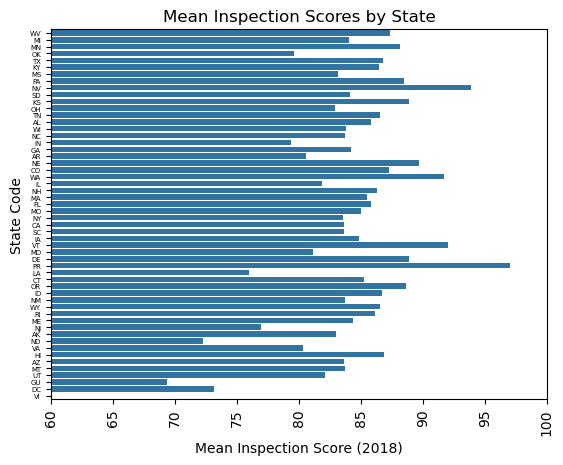

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x = grouped_2col_df[("INSPECTION_SCORE_2018", "mean")],
    y = grouped_2col_df.index.get_level_values("STATE_CODE"),
    orient = 'h',
    errorbar = None)  # Disables error bars

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2018)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

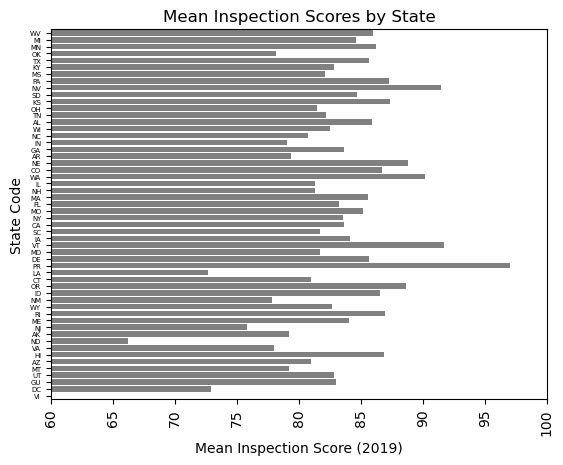

In [147]:
sns.barplot(
    x = grouped_2col_df[("INSPECTION_SCORE_2019", "mean")],
    y = grouped_2col_df.index.get_level_values("STATE_CODE"),
    orient = 'h',
    color = 'grey',
    errorbar = None)  # Disables error bars

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2019)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

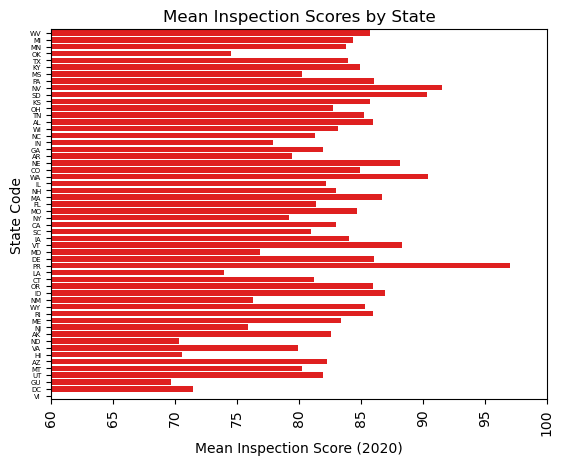

In [149]:
sns.barplot(
    x = grouped_2col_df[("INSPECTION_SCORE_2020", "mean")],
    y = grouped_2col_df.index.get_level_values("STATE_CODE"),
    orient = 'h',
    color = 'red',
    errorbar = None)  # Disables error bars

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2020)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

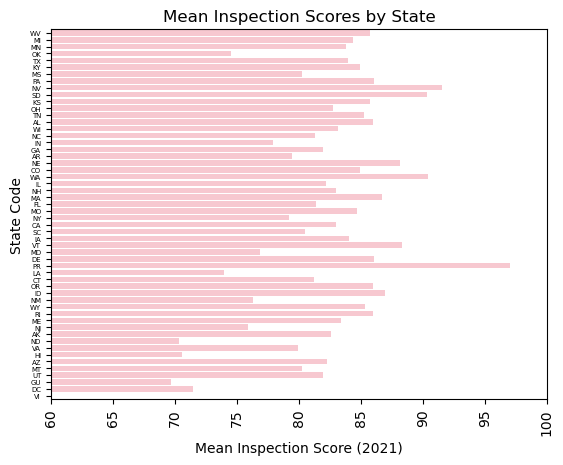

In [151]:
sns.barplot(
    x = grouped_2col_df[("INSPECTION_SCORE_2021", "mean")],
    y = grouped_2col_df.index.get_level_values("STATE_CODE"),
    color = 'pink',
    orient = 'h',
    errorbar = None)  # Disables error bars

plt.yticks(fontsize=5)  # Reduce font size to fit more labels
plt.xlabel("Mean Inspection Score (2021)")
plt.ylabel("State Code")
plt.title("Mean Inspection Scores by State")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlim(60, 100)  # to select states with a passing score
plt.show()

## Comment
The plots are representing the yearly mean inspection scores by states in the US. The focus has been on the passing inpection scores being a minimum score of 60.

#### Part 3:
**Differences between Matplotlib and Seaborn for visualization:**

**Matplotlib** (Used in Part 1):
    Provides a low-level, customizable approach to plotting, requires more manual adjustments for aesthetics (e.g., colors, label rotation, spacing), and best for full control over figure elements.

**Seaborn** (Used in Part 2):
    Built on top of Matplotlib, offering higher-level API for statistical visualization, automatically applies better formatting and styles, reducing manual tweaking. Includes built-in error bars (removed using `errorbar = None`). Works well with Pandas DataFrames, allowing direct use of column names.
 
 In summary: Matplotlib is more hands-on and customizable, while Seaborn simplifies visualization with better defaults.


# Conclusion

As previously stated, the mean inspection scores remain relatively constant in each state throughout the years.